<a href="https://colab.research.google.com/github/BrianMohamadSafiudin/Machine-Learning-2023/blob/main/UAS/UASMachineLearning_BrianFebryanFafan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anggota Kelompok 3 :**

- 2141720133 - Brian Mohamad Safiudin
- 2141720059 - Febryan Rizki Hidayatullah
- 2141720140 - M. Rizky Mafazan

---
# **Tugas Akhir - OCR KTP**
---

Untuk ML cukup di dipresentasikan saja hasil di google colab dan deploynya yang meliputi kriteria berikut

 1. Dataset
 2. Arsitektur Model
 3. Pelatihan Model
 4. Validasi dan Evaluasi
 5. Deploy

---
## **1. Dataset**
---
- Penggunaan dataset ektp yang mencakup variasi data yang memadai.
- Dataset harus dibagi dengan baik antara data pelatihan, validasi, dan pengujian untuk evaluasi model secara menyeluruh.
- Menyertakan proses pra-pemrosesan data, seperti normalisasi dan augmentasi data.

In [ ]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


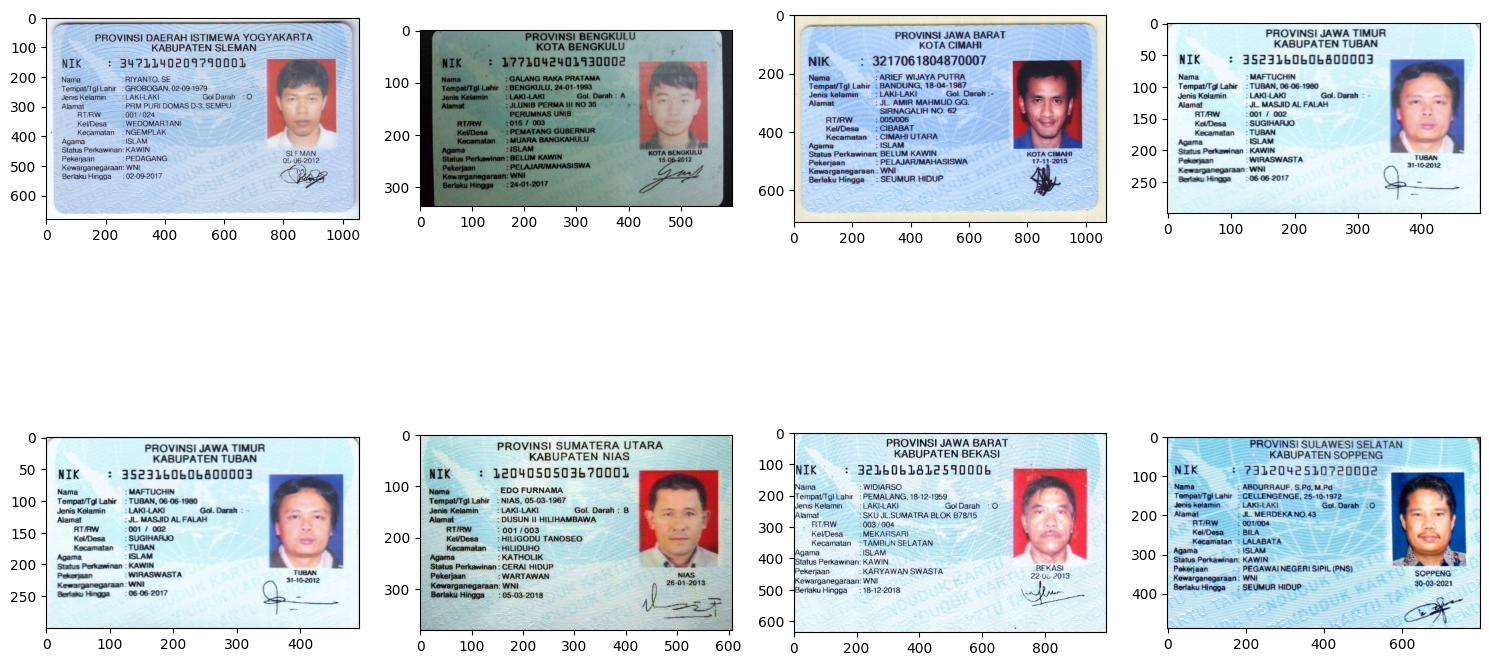

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Daftar path gambar
image_paths = [
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp1.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp2.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp3.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp4.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp5.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp6.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/KTP7.jpeg',
]

# Mengatur jumlah gambar per baris
images_per_row = 4
num_images = len(image_paths)
num_rows = (num_images + images_per_row - 1) // images_per_row

# Membuat kisi-kisi subplot
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Menampilkan gambar menggunakan Matplotlib
for i, path in enumerate(image_paths):
    try:
        img = Image.open(path)
        axes[i].imshow(img)
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


 ---
## **2. Arsitektur Model**
---
 - Penggunaan arsitektur model Convolutional Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import load_model  # Mengimpor fungsi untuk memuat model
model = load_model("/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/modeltrainedbrianfebryanfafan.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

---
##### Output tersebut adalah ringkasan arsitektur model neural network berdasarkan struktur layer-layer yang digunakan. Berikut adalah penjelasan setiap bagian dari ringkasan tersebut:
---
- Model Type: "sequential" menunjukkan bahwa model ini adalah model sequential, yang berarti setiap layer ditambahkan secara berurutan.

- conv2d (Conv2D): Layer konvolusi dengan 32 filter, ukuran kernel 3x3, dan fungsi aktivasi default ReLU. Outputnya memiliki ukuran (26, 26, 32). Total parameter untuk layer ini adalah 320.

- max_pooling2d (MaxPooling2D): Layer max pooling dengan ukuran pool 2x2, yang mengurangi dimensi output menjadi (13, 13, 32).

- conv2d_1 (Conv2D): Layer konvolusi kedua dengan 64 filter, ukuran kernel 3x3, dan aktivasi ReLU. Outputnya menjadi (13, 13, 64), dengan total parameter 18,496.

- max_pooling2d_1 (MaxPooling2D): Layer max pooling kedua, mengurangi dimensi menjadi (6, 6, 64).

- conv2d_2 (Conv2D): Layer konvolusi ketiga dengan 128 filter, ukuran kernel 3x3, dan aktivasi ReLU. Outputnya menjadi (4, 4, 128), dengan total parameter 73,856.

- max_pooling2d_2 (MaxPooling2D): Layer max pooling ketiga, mengurangi dimensi menjadi (2, 2, 128).

- flatten (Flatten): Layer flatten mengubah output menjadi vektor 1D dengan ukuran 512.

- dense (Dense): Layer dense (fully connected) dengan 64 neuron dan aktivasi ReLU. Total parameter untuk layer ini adalah 32,832.

- dense_1 (Dense): Layer dense kedua dengan 128 neuron dan aktivasi ReLU. Total parameter 8,320.

- dense_2 (Dense): Layer dense ketiga dengan 36 neuron dan aktivasi default (mungkin softmax dalam kasus klasifikasi). Total parameter 4,644.

- Total Params: Menunjukkan total parameter dalam model, yang mencakup parameter yang dapat dipelajari (trainable params) dan parameter yang tidak dapat dipelajari (non-trainable params).

- Trainable Params: Menunjukkan jumlah parameter yang dapat dipelajari dalam model, yang akan diupdate selama proses pelatihan.

- Non-trainable Params: Menunjukkan jumlah parameter yang tidak dapat dipelajari, biasanya terkait dengan parameter konstan atau parameter yang tidak memerlukan pembaruan.

---
# **3. Pelatihan Model**
---
 - Proses pelatihan model dengan parameter pelatihan yang tepat.
 - Melakukan penyesuaian hiperparameter untuk meningkatkan performa jika diperlukan
 - Google Colab Model: https://drive.google.com/file/d/1_ZWOhOdOm3O32Xv-LyK6RVZ0-uW72b7y/view?usp=sharing
 - Google Drive Model: https://drive.google.com/file/d/1Ylv1ZRjI089G4Sy9qJzdeS7--AkmoXFw/view?usp=sharing

---
# **4. Validasi dan Evaluasi**
---
 - Melakukan validasi model pada dataset yang terpisah untuk memastikan generalisasi yang baik.

In [ ]:
# Import libraries
import numpy as np  # Mengimpor pustaka NumPy untuk operasi numerik
import imutils  # Mengimpor pustaka Imutils untuk fungsi utilitas pengolahan gambar
import cv2  # Mengimpor pustaka OpenCV untuk tugas visi komputer
import tensorflow as tf  # Mengimpor pustaka TensorFlow untuk tugas deep learning
from tensorflow.keras.models import load_model  # Mengimpor fungsi untuk memuat model
from imutils.contours import sort_contours  # Mengimpor fungsi untuk mengurutkan kontur pada gambar
from google.colab.patches import cv2_imshow  # Mengimpor fungsi untuk menampilkan gambar di Google Colab
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk membuat plot

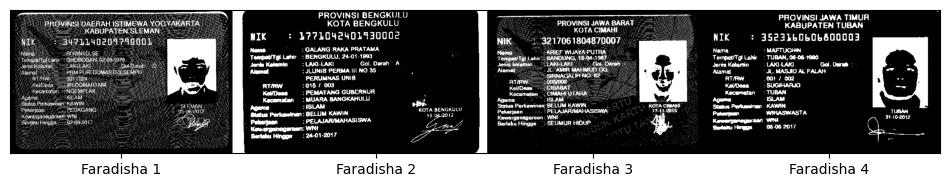

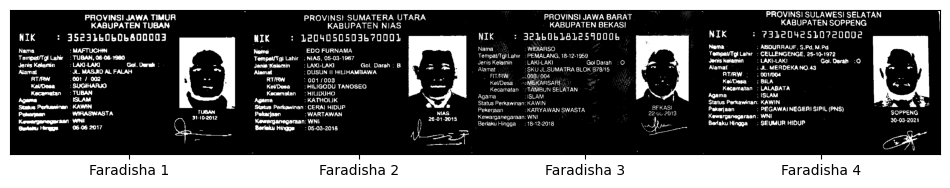

In [ ]:
def preprocess(image):
    # Mengonversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Mengonversi gambar ke bentuk biner menggunakan thresholding Otsu
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalisasi gambar
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

# Daftar path gambar
image_paths = [
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp1.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp2.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp3.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp4.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp5.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp6.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/KTP7.jpeg',
]

# Jumlah gambar yang akan ditampilkan dalam setiap baris
images_per_row = 4

# Tinggi umum untuk resizing
common_height = 1000  # Sesuaikan kebutuhan

# Memproses dan menampilkan gambar dalam bentuk grid
for i in range(0, len(image_paths), images_per_row):
    # Membaca dan memproses gambar untuk baris saat ini
    images_row = [preprocess(cv2.imread(img_path)) for img_path in image_paths[i:i+images_per_row]]

    # Meresize gambar ke tinggi umum sambil mempertahankan rasio aspek
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images_row]
    heights = [int(common_height) for _ in range(len(images_row))]
    widths = [int(common_height * aspect_ratio) for aspect_ratio in aspect_ratios]

    images_row_resized = [cv2.resize(img, (width, height)) for img, width, height in zip(images_row, widths, heights)]

    # Menggabungkan gambar secara horizontal
    row_image = np.concatenate(images_row_resized, axis=1)

    # Menampilkan baris gambar dengan judul dan penggaris
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.imshow(row_image, cmap='gray')

    # Mengatur tick dan label
    ticks = np.cumsum(widths) - widths[0] / 2
    ax.set_xticks(ticks)
    ax.set_yticks([])  # Tidak ada tick pada sumbu y
    if i < 5:
        ax.set_xticklabels([f'Faradisha {i+1}' for i in range(len(ticks))])
    elif 5 <= i < 10:
        ax.set_xticklabels([f'Clarita {i+1}' for i in range(len(ticks))])
    else:
        ax.set_xticklabels([f'Mirabell {i+1}' for i in range(len(ticks))])

    # Menampilkan plot
    plt.show()

---
## **Evaluasi Fitur**
---

In [ ]:
import cv2  # Mengimpor pustaka OpenCV untuk tugas visi komputer
import numpy as np  # Mengimpor pustaka NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk membuat plot

def preprocess(image):
    # Mengonversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Mengonversi gambar ke bentuk biner menggunakan thresholding Otsu
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalisasi gambar
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

def extract_features(image):
    # Mengonversi gambar ke array datar
    arr = image.reshape((image.shape[0] * image.shape[1], 1))
    # Menghitung fitur-fitur
    features = np.array([np.sum(arr), np.var(arr), np.std(arr)])
    return features

# Daftar path gambar
image_paths = [
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp1.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp2.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp3.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp4.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp5.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp6.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/KTP7.jpeg',
]

# Proses
for i in range(0, len(image_paths), images_per_row):
    # Ekstrak fitur untuk setiap gambar
    for j, img_path in enumerate(image_paths[i:i+images_per_row]):
        img = preprocess(cv2.imread(img_path))
        features = extract_features(img)
        print(f'Image {i + j + 1} Features: {features}')

Image 1 Features: [1.7769300e+05 1.8633980e-01 4.3167094e-01]
Image 2 Features: [3.75220000e+04 1.50787426e-01 3.88313566e-01]
Image 3 Features: [1.78735000e+05 1.80445865e-01 4.24789201e-01]
Image 4 Features: [2.38690000e+04 1.35340608e-01 3.67886678e-01]
Image 5 Features: [2.38690000e+04 1.35340608e-01 3.67886678e-01]
Image 6 Features: [3.58370000e+04 1.30771053e-01 3.61622805e-01]
Image 7 Features: [8.58030000e+04 1.17104891e-01 3.42205920e-01]
Image 8 Features: [6.29950000e+04 1.35323048e-01 3.67862811e-01]


---
##### Output di atas menampilkan hasil ekstraksi fitur untuk setiap gambar dalam dataset. Setiap baris mencakup informasi fitur untuk satu gambar, dan fitur-fitur yang diekstrak termasuk:
---
##### 1. Jumlah piksel dalam gambar setelah di-flatten (sum)
##### 2. Varians nilai piksel dalam gambar (var)
##### 3. Standar deviasi nilai piksel dalam gambar (std)

##### Ini memberikan gambar representasi numerik berdasarkan jumlah piksel, variasi, dan standar deviasi nilai piksel dalam gambar tersebut. Informasi ini dapat digunakan sebagai fitur untuk pengembangan model atau analisis lebih lanjut tergantung pada tujuan aplikasi.

---
## **5. Deploy dan API**
---
-  Menggunakan Flask untuk membuat API yang dapat diakses oleh aplikasi mobile.
-  Menjelaskan cara model dapat diintegrasikan dan digunakan dalam aplikasi mobile.
- Menyediakan dokumentasi yang lengkap untuk seluruh proyek, termasuk langkah-langkah pelatihan model, pengujian

#### Pindah screen dilanjutkan ke demo ocr pada aplikasi